In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
df_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE']
df.drop(columns=df_drop, inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  STATE             1337 non-null   object 
 15  COUNTRY           2823 non-null   object 
 16  CONTACTLASTNAME   2823 non-null   object 


In [4]:
for col in df.columns.values:
    print(df[col].value_counts())

ORDERNUMBER
10332    18
10106    18
10159    18
10168    18
10398    18
         ..
10242     1
10189     1
10286     1
10216     1
10294     1
Name: count, Length: 307, dtype: int64
QUANTITYORDERED
34    112
21    103
46    101
27    100
31     97
41     97
45     97
26     96
29     94
48     94
25     94
20     93
33     92
22     92
32     91
24     91
38     91
49     91
36     89
44     89
37     87
43     85
39     84
28     82
40     78
42     76
30     75
23     73
35     71
47     70
50     65
55     16
66      5
15      4
51      4
61      3
18      3
60      3
76      3
59      3
56      3
19      3
64      3
10      2
6       2
11      2
54      2
70      2
97      1
85      1
62      1
52      1
16      1
13      1
58      1
65      1
12      1
77      1
Name: count, dtype: int64
PRICEEACH
100.00    1304
59.87        6
96.34        6
57.73        5
80.55        5
          ... 
48.30        1
87.96        1
36.21        1
98.48        1
62.24        1
Name: count, Length:

In [5]:
df.drop(columns=['ORDERDATE', 'STATUS', 'MONTH_ID', 'QTR_ID', 'YEAR_ID'], inplace=True, errors='ignore')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,Motorcycles,95,S10_1678,Land of Toys Inc.,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,Motorcycles,95,S10_1678,Reims Collectables,NaN,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,Motorcycles,95,S10_1678,Toys4GrownUps.com,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,CA,USA,Brown,Julie,Medium


In [6]:
from sklearn.preprocessing import LabelEncoder

def convert_categories(col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].values)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,Motorcycles,95,S10_1678,Land of Toys Inc.,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,Motorcycles,95,S10_1678,Reims Collectables,NaN,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,Motorcycles,95,S10_1678,Toys4GrownUps.com,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,CA,USA,Brown,Julie,Medium


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

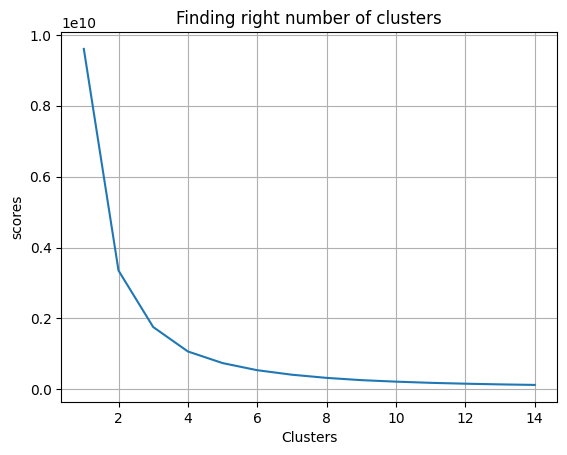

In [8]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[numerical_cols])  # Assuming 'df[numerical_cols]' contains the relevant data
    wcss.append(kmeans.inertia_)
k = list(range(1,15))
plt.plot(k,wcss)
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.title('Finding right number of clusters')
plt.grid()
plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
data = load_iris()
X = data.data  
y = data.target  
parameters_grid = {"n_neighbors": np.arange(0, 50)}
knn = KNeighborsClassifier()
knn_GSV = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=5)
knn_GSV.fit(X, y)
print("Best Param", knn_GSV.best_params_)
print("Best score", knn_GSV.best_score_)

Best Param {'n_neighbors': 6}
Best score 0.9800000000000001


/home/faraz/AI-ML/Machine-Learning-SPPU-2019-Pattern/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/faraz/AI-ML/Machine-Learning-SPPU-2019-Pattern/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/faraz/AI-ML/Machine-Learning-SPPU-2019-Pattern/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/faraz/AI-ML/Machine-Learning-SPPU-2019-Patte